In [40]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("worldcities.csv")
cc = pd.read_csv("countrycontinent.csv")
cc_dict = dict(zip(cc["Country"], cc["Continent"]))
# rename some countries in dict
cc_dict["United States"] = "North America"
cc_dict["Russia"] = "Asia"
cc_dict['Congo (Kinshasa)'] = "Africa"
cc_dict['Congo (Brazzaville)'] = "Africa"
cc_dict['South Korea'] = "Asia"
cc_dict['Myanmar' ] = "Asia"
cc_dict['North Korea'] = "Asia"
cc_dict['Burkina Faso'] = "Africa"
cc_dict["Taiwan"] = "Asia"
cc_dict["Hong Kong"] = "Asia"
cc_dict["Puerto Rico"] = "North America"
cc_dict["Czechia"] = "Europe"
cc_dict["Côte d'Ivoire"] = "Africa"
df["continent"] = df["country"].apply(lambda x: cc_dict[x] if x in cc_dict else "NA")
df.head()

In [112]:
dd

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [101]:
countries_over_100 = df[df["Population"]>100000000]["country"].unique()
countries_over_10 = df[df["Population"]>10000000]["country"].unique()
df_100 = df[df["country"].isin(countries_over_100)]
df_10 = df[df["country"].isin(countries_over_10)]

In [102]:
df = pd.read_csv("worldcities.csv")
dd = pd.read_csv('countries of the world.csv')
dd["Country"] = dd["Country"].apply(lambda x: x.strip())
df = pd.merge(df, dd, left_on='country', right_on='Country')


In [142]:
df_ls = []
capitals = df[((df["capital"]=="primary") & (df["population"]>10000))]
df_ls.append(capitals)


In [143]:
nmost = 4
df_tmp = df_100
df_tmp = df_tmp.groupby(["country"]).agg({"city": lambda x: x.to_list(), "population": lambda x: x.to_list(), "lat": lambda x: x.to_list(), "lng": lambda x: x.to_list()})
df_tmp["city"] = df_tmp["city"].apply(lambda x: x[:nmost])
df_tmp["population"] = df_tmp["population"].apply(lambda x: x[:nmost])
df_tmp["lat"] = df_tmp["lat"].apply(lambda x: x[:nmost])
df_tmp["lng"] = df_tmp["lng"].apply(lambda x: x[:nmost])
df_tmp = df_tmp.sort_values("population", ascending=False).reset_index()
#df_tmp = df_tmp.groupby("continent").reset_index()
df_tmp = df_tmp.explode("city").reset_index(drop=True)
df_ls.append(df_tmp)


In [144]:
nmost = 3
df_tmp = df_10
df_tmp = df_tmp.groupby(["country"]).agg({"city": lambda x: x.to_list(), "population": lambda x: x.to_list(), "lat": lambda x: x.to_list(), "lng": lambda x: x.to_list()})
df_tmp["city"] = df_tmp["city"].apply(lambda x: x[:nmost])
df_tmp["population"] = df_tmp["population"].apply(lambda x: x[:nmost])
df_tmp["lat"] = df_tmp["lat"].apply(lambda x: x[:nmost])
df_tmp["lng"] = df_tmp["lng"].apply(lambda x: x[:nmost])
df_tmp = df_tmp.sort_values("population", ascending=False).reset_index()
#df_tmp = df_tmp.groupby("continent").reset_index()
df_tmp = df_tmp.explode("city").reset_index(drop=True)
df_ls.append(df_tmp)


In [145]:
nmost = 2
df_tmp = df[(df["Population"]>1000000)]
df_tmp = df_tmp.groupby(["country"]).agg({"city": lambda x: x.to_list(), "population": lambda x: x.to_list(), "lat": lambda x: x.to_list(), "lng": lambda x: x.to_list()})
df_tmp["city"] = df_tmp["city"].apply(lambda x: x[:nmost])
df_tmp["population"] = df_tmp["population"].apply(lambda x: x[:nmost])
df_tmp["lat"] = df_tmp["lat"].apply(lambda x: x[:nmost])
df_tmp["lng"] = df_tmp["lng"].apply(lambda x: x[:nmost])
df_tmp = df_tmp.sort_values("population", ascending=False).reset_index()
#df_tmp = df_tmp.groupby("continent").reset_index()
df_tmp = df_tmp.explode("city").reset_index(drop=True)
df_ls.append(df_tmp)

In [146]:

df_total = pd.concat(df_ls)
df_total["lat"] = df_total["lat"].apply(lambda x: x[0] if isinstance(x, list) else x)
df_total["lng"] = df_total["lng"].apply(lambda x: x[0] if isinstance(x, list) else x)
df_total["population"] = df_total["population"].apply(lambda x: x[0] if isinstance(x, list) else x)
df_total.drop_duplicates(subset=["city"], inplace=True)


In [147]:
df_total


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,...,"461,2","12,19","0,96","86,85",3,"9,37","9,16","0,017","0,258","0,725"
1253,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,...,"52,0","11,32","7,23","81,45",2,"20,34","6,25","0,134","0,458","0,408"
1569,New Delhi,New Delhi,28.6139,77.2090,India,IN,IND,Delhi,primary,249998.0,...,"45,4","54,4","2,74","42,86","2,5","22,01","8,18","0,186","0,276","0,538"
7452,Beijing,Beijing,39.9040,116.4075,China,CN,CHN,Beijing,primary,18522000.0,...,"266,7","15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403"
9012,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,24922000.0,...,"38,4","18,95","16,77","64,28",2,"24,89","5,41","0,144","0,326","0,53"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,Nāblus,NaN,31.5333,35.0950,West Bank,NaN,NaN,NaN,NaN,215452.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,Curepipe,NaN,-20.1644,57.5042,Mauritius,NaN,NaN,NaN,NaN,149194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,Zürich,NaN,46.9481,7.4475,Switzerland,NaN,NaN,NaN,NaN,133883.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,Paro,NaN,27.4722,89.6361,Bhutan,NaN,NaN,NaN,NaN,104000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
# split capitals randomly in 10 groups
df_total["group"] = df_total["city"].apply(lambda x: hash(x) % 10)
# replace ' with '' to avoid SQL errors
df_total["city"] = df_total["city"].apply(lambda x: x.replace("'", ""))
df_total["country"] = df_total["country"].apply(lambda x: x.replace("'", ""))


In [194]:
num_of_groups = 10
level_counter = 0
counter_max = [5, 10, 10, 10, 10, 10, 10, 10, 10, 10]
score_needed = [10000, 20000, 25000, 30000, 30000, 40000, 40000, 50000, 50000, 50000]
header = ""
header += "const locations = [\n"
for i in range(num_of_groups):
    header += "  {\n"
    header += "    level: " + str(level_counter+1) + ",\n"
    header += "    counter_max: " + str(counter_max[i]) + ",\n"
    header += "    score_needed: "+ str(score_needed[i]) + ",\n"
    header += "    cities: [\n"
    for index, row in df_total[df_total["group"]==i].iterrows():
        header += "      {\n"
        header += "        city: '" + row["city"] + "',\n"
        header += "        lat: " + str(row["lat"]) + ",\n"
        header += "        lng: " + str(row["lng"]) + ",\n"
        header += "        country: '" + row["country"] + "',\n"
        header += "        population: " + str(row["population"]) + ",\n"
        header += "      },\n"
    header += "    ],\n"
    header += "      },\n"

header += "  ];\n"

with open("location_test.js", mode="w") as f:
        f.write(header)



In [150]:
df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,...,"461,2","12,19","0,96","86,85",3,"9,37","9,16","0,017","0,258","0,725"
1,Ōsaka,Osaka,34.6939,135.5022,Japan,JP,JPN,Ōsaka,admin,15126000.0,...,"461,2","12,19","0,96","86,85",3,"9,37","9,16","0,017","0,258","0,725"
2,Nagoya,Nagoya,35.1833,136.9000,Japan,JP,JPN,Aichi,admin,9197000.0,...,"461,2","12,19","0,96","86,85",3,"9,37","9,16","0,017","0,258","0,725"
3,Yokohama,Yokohama,35.4442,139.6381,Japan,JP,JPN,Kanagawa,admin,3757630.0,...,"461,2","12,19","0,96","86,85",3,"9,37","9,16","0,017","0,258","0,725"
4,Fukuoka,Fukuoka,33.5833,130.4000,Japan,JP,JPN,Fukuoka,admin,2286000.0,...,"461,2","12,19","0,96","86,85",3,"9,37","9,16","0,017","0,258","0,725"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43781,Idhnā,Idhna,31.5586,34.9761,West Bank,XW,XWB,NaN,NaN,19012.0,...,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
43782,Bayt Jālā,Bayt Jala,31.7150,35.1872,West Bank,XW,XWB,NaN,NaN,13484.0,...,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
43783,Ya‘bad,Ya`bad,32.4467,35.1703,West Bank,XW,XWB,NaN,NaN,13640.0,...,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
43784,Bayt Sāḩūr,Bayt Sahur,31.7000,35.2167,West Bank,XW,XWB,NaN,NaN,13281.0,...,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"


,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [182]:
# score function
import numpy as np
import matplotlib.pyplot as plt
xr = np.linspace(0, 20000, 10)
max_distance = 20000

In [190]:
def score_func(distance, neg_factor=-0.001):

    return np.exp(neg_factor*(max_distance-(max_distance-distance)))*6000

5940.299002495009
5429.024508215757
2207.276647028654
812.0116994196762


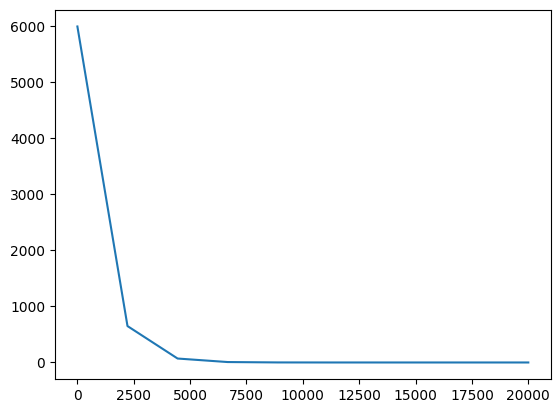

In [191]:
print(score_func(10))
print(score_func(100))
print(score_func(1000))
print(score_func(2000))
plt.plot(xr, score_func(xr))